# titanic 데이터

In [1]:
titanic <- read.csv("../../Data/Titanic_train.csv"); head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# NA 확인 및 처리

In [2]:
colSums(is.na(titanic))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

### 나이 na값을 결혼 유무에 따라 평균값 입력

In [3]:
library(stringr)

In [4]:
titanic_ex <- titanic

In [5]:
titanic_ex$title <- ifelse(grepl('mrs.', titanic$Name, ignore.case = T), 'Mrs.', ifelse(grepl('mr.', titanic$Name, ignore.case = T),'Mr.', ifelse(grepl('miss.', titanic$Name, ignore.case = T), 'Miss.', 'none')))

In [6]:
str(titanic_ex)

'data.frame':	891 obs. of  13 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ title      : chr  "Mr." "Mrs." "Miss." "Mrs." ...


In [7]:
mr_na <- rownames(subset(titanic_ex, is.na(titanic_ex$Age)&title == 'Mr.'))

In [8]:
titanic_ex[mr_na,'Age'] <- round(mean(subset(titanic_ex, title == 'Mr.' & !is.na(titanic_ex$Age))$Age),0)

In [9]:
mrs_na <- rownames(subset(titanic_ex, is.na(titanic_ex$Age)&title == 'Mrs.'))

In [10]:
titanic_ex[mrs_na,'Age'] <- round(mean(subset(titanic_ex, title == 'Mrs.' & !is.na(titanic_ex$Age))$Age),0)

In [11]:
miss_na <- rownames(subset(titanic_ex, is.na(titanic_ex$Age)&title == 'Miss.'))

In [12]:
titanic_ex[miss_na,'Age'] <- round(mean(subset(titanic_ex, title == 'Miss.' & !is.na(titanic_ex$Age))$Age),0)

In [13]:
none_na <- rownames(subset(titanic_ex, is.na(titanic_ex$Age)&title == 'none'))

In [14]:
titanic_ex[none_na,'Age'] <- round(mean(subset(titanic_ex, title == 'none' & !is.na(titanic_ex$Age))$Age),0)

### 생존유무로 정렬

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
titanic_ex <- arrange(titanic_ex, Survived)

# Survived, Pclass, Sex, Embarked 추출

In [17]:
titanic_ex_1 <- titanic_ex[,c('Survived', 'Pclass', 'Sex', 'Embarked')]; str(titanic_ex_1)

'data.frame':	891 obs. of  4 variables:
 $ Survived: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [18]:
head(titanic_ex_1)

Survived,Pclass,Sex,Embarked
0,3,male,S
0,3,male,S
0,3,male,Q
0,1,male,S
0,3,male,S
0,3,male,S


### male: 0, female: 1로 변경

In [19]:
titanic_ex_1$Sex <- ifelse(titanic_ex_1$Sex == 'male', 0, 1); head(titanic_ex_1); str(titanic_ex_1)

Survived,Pclass,Sex,Embarked
0,3,0,S
0,3,0,S
0,3,0,Q
0,1,0,S
0,3,0,S
0,3,0,S


'data.frame':	891 obs. of  4 variables:
 $ Survived: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass  : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Sex     : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


### embarked TF값으로 변경 -> 컬럼 생성

In [20]:
titanic_ex_1$Embarked_S <- titanic_ex_1$Embarked == "S"
titanic_ex_1$Embarked_Q <- titanic_ex_1$Embarked == "Q"
titanic_ex_1$Embarked_C <- titanic_ex_1$Embarked == "C"

### Embarked 컬럼 삭제

In [21]:
titanic_ex_1 <- subset(titanic_ex_1, select = -Embarked);

In [22]:
head(titanic_ex_1);

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C
0,3,0,TRUE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,1,0,TRUE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE


### titanic_ex에서 추가 데이터 추출

In [23]:
head(titanic_ex)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.
6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,none
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,Mr.


### 친족, 가족 유무 합계 컬럼 추가

In [24]:
titanic_ex$sipa <- titanic_ex$SibSp + titanic_ex$Parch; head(titanic_ex)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,sipa
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,0
6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,,Q,Mr.,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,none,4
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,Mr.,0


### 부양가족에 따른 생존률 확인해보기

In [25]:
sipadeath <- merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(sipa) %>%
    summarise(생존 = length(Survived)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(sipa) %>%
    summarise(사망 = length(Survived)))

In [26]:
sipadeath$생존률 <- sipadeath$생존/(sipadeath$생존+sipadeath$사망)*100; sipadeath

sipa,생존,사망,생존률
0,163,374,30.35382
1,89,72,55.27950
2,59,43,57.84314
3,21,8,72.41379
4,3,12,20.00000
5,3,19,13.63636
6,4,8,33.33333


In [27]:
# 부양가족 유무에 따른 생존율
sipadeath <- rbind(sipadeath,c(apply(sipadeath[2:7,1:3], 2, sum), 179/(162+179)*100))[c(1,8),]; sipadeath

,sipa,생존,사망,생존률
1,0,163,374,30.35382
8,21,179,162,52.49267


In [28]:
titanic_ex$sipaTF <- titanic_ex$sipa == 0; titanic_ex

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,sipa,sipaTF
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,1,FALSE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,0,TRUE
6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,,Q,Mr.,0,TRUE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,0,TRUE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,none,4,FALSE
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,Mr.,0,TRUE
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,,S,Mr.,6,FALSE
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S,Miss.,0,TRUE
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,,Q,none,5,FALSE
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18.0000,,S,Mrs.,1,FALSE


In [29]:
# 부양가족 유무 데이터셋에 추가
titanic_ex_1$sipaTF <- titanic_ex$sipaTF; titanic_ex_1; str(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,TRUE,FALSE,TRUE
0,1,0,TRUE,FALSE,FALSE,TRUE
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,1,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,TRUE,FALSE,FALSE
0,3,1,TRUE,FALSE,FALSE,FALSE


'data.frame':	891 obs. of  7 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Sex       : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sipaTF    : logi  FALSE TRUE TRUE TRUE FALSE TRUE ...


In [30]:
# Survived컬럼 Factor 변환
titanic_ex_1$Survived <- as.factor(titanic_ex_1$Survived); str(titanic_ex_1)

'data.frame':	891 obs. of  7 variables:
 $ Survived  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Sex       : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sipaTF    : logi  FALSE TRUE TRUE TRUE FALSE TRUE ...


### 중간 점검 (다수 모델 확인작업)

In [31]:
library(randomForest)
library(nnet)
library(e1071)
library(party)
library(caret)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich

Attaching package: ‘strucchange’

The following object is masked from ‘package:stringr’:

    boundary

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [90]:
predRF <- function(data, target, num, tree){
    result <- c()
    for(i in 1:num){
        sample <- createDataPartition(data[,1], p = 0.7, list = F)
    
        data.tr <- data[sample,]
        data.test <- data[-sample,]
    
        ques <- data.test[,-1]
        ans <- data.test[,1]
    
        model <- randomForest(formula = as.formula(paste(target, '~', '.')),data = data.tr, ntree = tree)
        pred <- predict(model, ques)
        result <- c(result, mean(pred==ans))
    }
    cat('randomForest\n')
    cat(result, '평균:',mean(result),'\n', sep=" ")
    cat(table(result))
}

In [33]:
predCT <- function(data, target, num){
    result <- c()
    for(i in 1:num){
        sample <- createDataPartition(data[,1], p = 0.7, list = F)
    
        data.tr <- data[sample,]
        data.test <- data[-sample,]
    
        ques <- data.test[,-1]
        ans <- data.test[,1]
    
        model <- ctree(formula = as.formula(paste(target, '~', '.')), data = data.tr)
        pred <- predict(model, ques)
        result <- c(result, mean(pred==ans))
    }
    cat('ctree\n')
    cat(result, '평균:',mean(result),'\n', sep=" ")
}

In [34]:
predNN <- function(data, target, num){
    result <- c()
    for(i in 1:num){
        sample <- createDataPartition(data[,1], p = 0.7, list = F)
    
        data.tr <- data[sample,]
        data.test <- data[-sample,]
    
        ques <- data.test[,-1]
        ans <- data.test[,1]
    
        model <- nnet(formula = as.formula(paste(target, '~', '.')), data = data.tr, size = 5)
        pred <- predict(model, ques, type = 'class')
        result <- c(result, mean(pred==ans))
    }
    cat('nnet\n')
    cat(result, '평균:',mean(result),'\n', sep=" ")
}

In [35]:
predSVM <- function(data, target, num){
    result <- c()
    for(i in 1:num){
        sample <- createDataPartition(data[,1], p = 0.7, list = F)
    
        data.tr <- data[sample,]
        data.test <- data[-sample,]
    
        ques <- data.test[,-1]
        ans <- data.test[,1]
    
        model <- svm(formula = as.formula(paste(target, '~', '.')), data = data.tr)
        pred <- predict(model, ques)
        result <- c(result, mean(pred==ans))
    }
    cat('SVM\n')
    cat(result, '평균:',mean(result),'\n', sep=" ")
}

In [36]:
predLogit <- function(data, target, num){
    result <- c()
    for(i in 1:num){
        sample <- createDataPartition(data[,1], p = 0.7, list = F)
    
        data.tr <- data[sample,]
        data.test <- data[-sample,]
    
        ques <- data.test[,-1]
        ans <- data.test[,1]
    
        model <- multinom(formula = as.formula(paste(target, '~', '.')), data = data.tr)
        pred <- predict(model, ques)
        result <- c(result, mean(pred==ans))
    }
    cat('Logit\n')
    cat(result, '평균:',mean(result),'\n', sep=" ")
}

### 종합 예측율

In [37]:
head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,TRUE,FALSE,TRUE
0,1,0,TRUE,FALSE,FALSE,TRUE
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE


In [38]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predRF(titanic_ex_1, 5, 100)
predSVM(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived', 5)

# weights:  41
initial  value 428.465705 
iter  10 value 294.395513
iter  20 value 276.485756
iter  30 value 271.847549
iter  40 value 270.624329
iter  50 value 269.630721
iter  60 value 269.425205
iter  70 value 269.306710
iter  80 value 269.167899
iter  90 value 269.074377
iter 100 value 269.029545
final  value 269.029545 
stopped after 100 iterations
# weights:  41
initial  value 634.647762 
iter  10 value 282.510025
iter  20 value 266.622771
iter  30 value 265.300990
iter  40 value 264.969577
iter  50 value 264.941411
iter  60 value 264.889883
iter  70 value 264.768966
iter  80 value 264.558478
iter  90 value 264.315406
iter 100 value 264.256684
final  value 264.256684 
stopped after 100 iterations
# weights:  41
initial  value 510.831070 
iter  10 value 331.220602
iter  20 value 314.624706
iter  30 value 313.965782
iter  40 value 295.636642
iter  50 value 282.119919
iter  60 value 279.711344
iter  70 value 279.387558
iter  80 value 279.183041
iter  90 value 279.009897
iter 100 val

# 데이터 추가 추출

In [39]:
head(titanic_ex); head(titanic_ex_1)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,sipa,sipaTF
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr.,1,FALSE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr.,0,TRUE
6,0,3,"Moran, Mr. James",male,32,0,0,330877,8.4583,,Q,Mr.,0,TRUE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,0,TRUE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,none,4,FALSE
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,Mr.,0,TRUE


Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE
0,3,0,FALSE,TRUE,FALSE,TRUE
0,1,0,TRUE,FALSE,FALSE,TRUE
0,3,0,TRUE,FALSE,FALSE,FALSE
0,3,0,TRUE,FALSE,FALSE,TRUE


In [40]:
# 필요없는 컬럼 삭제
titanic_ex <- titanic_ex[,-c(1, 4, 7, 8, 9)];titanic_ex

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF
0,3,male,22,7.2500,,S,Mr.,1,FALSE
0,3,male,35,8.0500,,S,Mr.,0,TRUE
0,3,male,32,8.4583,,Q,Mr.,0,TRUE
0,1,male,54,51.8625,E46,S,Mr.,0,TRUE
0,3,male,2,21.0750,,S,none,4,FALSE
0,3,male,20,8.0500,,S,Mr.,0,TRUE
0,3,male,39,31.2750,,S,Mr.,6,FALSE
0,3,female,14,7.8542,,S,Miss.,0,TRUE
0,3,male,2,29.1250,,Q,none,5,FALSE
0,3,female,31,18.0000,,S,Mrs.,1,FALSE


In [41]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF
0,3,male,22,7.2500,,S,Mr.,1,FALSE
0,3,male,35,8.0500,,S,Mr.,0,TRUE
0,3,male,32,8.4583,,Q,Mr.,0,TRUE
0,1,male,54,51.8625,E46,S,Mr.,0,TRUE
0,3,male,2,21.0750,,S,none,4,FALSE
0,3,male,20,8.0500,,S,Mr.,0,TRUE


### 나이에 따른 분류 컬럼 추가

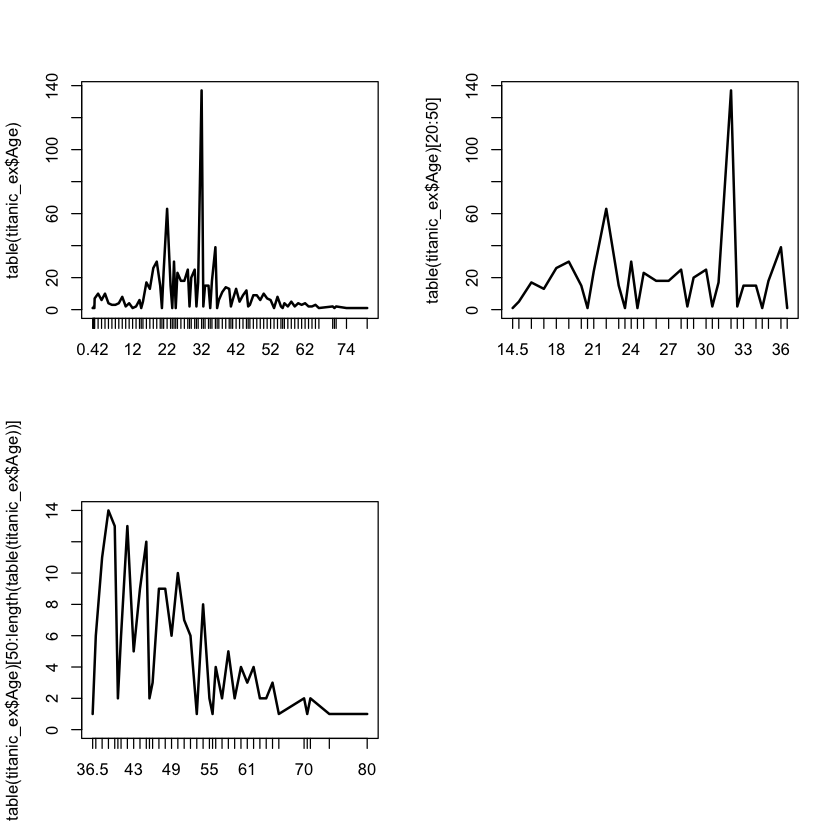

In [42]:
par(mfrow = c(2,2))
plot(table(titanic_ex$Age), type = 'l')
plot(table(titanic_ex$Age)[20:50], type = 'l')
plot(table(titanic_ex$Age)[50:length(table(titanic_ex$Age))], type = 'l')

### 0 ~ 20, 21 ~ 30, 31 ~ 35, 36 ~ 의 나이 분류 및 컬럼 추가

In [43]:
ifelse(titanic_ex$Age < 21, 0, ifelse(titanic_ex$Age < 31, 1, ifelse(titanic_ex$Age < 36, 2, 3)))

[1] 1 2 2 3 0 0 3 0 0 2 2 0 2 0 2 3 3 1 3 1 0 3 1 2 2 2 2 0 0 1 3 1 0 1 3 0 2
 [38] 0 1 2 0 1 1 1 2 2 1 1 0 2 1 1 0 3 1 3 2 3 2 1 2 1 2 3 1 3 3 0 1 0 0 1 3 1
 [75] 1 0 1 2 2 3 2 3 2 0 3 1 1 3 0 1 3 0 0 0 0 3 3 3 3 3 2 3 1 2 0 3 1 0 0 3 2
[112] 1 3 0 1 3 0 0 3 1 3 1 2 0 2 3 3 0 2 3 1 1 2 2 3 0 2 1 1 1 2 3 1 1 3 2 1 0
[149] 0 1 1 3 1 1 3 0 2 1 1 1 1 3 1 3 2 1 3 1 3 2 3 3 1 3 0 2 3 3 2 0 3 1 0 2 2
[186] 1 3 1 1 2 1 0 0 2 1 1 1 3 3 1 1 2 3 3 3 0 2 1 3 1 1 3 3 1 2 0 1 2 1 3 3 1
[223] 3 2 2 1 0 0 1 0 1 0 0 2 2 0 0 2 1 1 2 3 1 1 1 1 0 2 3 1 1 2 2 2 3 1 0 2 1
[260] 1 1 0 2 2 0 3 1 3 2 0 1 3 2 1 2 3 2 2 3 3 2 3 2 3 2 2 3 1 2 2 1 1 0 2 3 1
[297] 3 1 2 1 3 3 1 2 2 1 1 0 1 1 3 0 1 2 1 3 2 2 1 2 2 3 2 3 1 2 0 1 3 2 0 0 3
[334] 3 2 1 2 3 2 2 3 1 2 1 1 0 1 2 0 0 3 3 3 2 3 1 2 2 3 1 3 3 3 2 2 2 3 3 1 3
[371] 2 2 2 2 1 1 1 1 1 3 3 1 2 3 2 0 2 2 3 2 0 0 0 2 2 1 0 1 2 2 1 3 3 3 3 2 1
[408] 2 3 2 3 2 0 1 3 1 0 0 3 1 0 0 0 1 3 3 3 3 3 0 1 1 3 2 1 3 0 2 2 0 2 3 0 1
[445] 1 0 2 1 1 1 3 2 2 3 1 3 0 0 2 2 1 1 0 2 2 3 0 0 1 2 2 1 3 3 2 0 2 2 1 2 1
[482] 1 0 3 2 0 1 2 1 3 1 1 2 2 3 0 3 1 3 2 0 1 2 1 2 3 0 3 0 2 2 2 1 0 1 2 0 0
[519] 2 0 3 2 2 1 0 3 0 3 2 3 1 1 1 2 2 1 2 3 0 0 2 2 1 1 1 3 1 1 2 3 1 2 1 0 0
[556] 3 3 2 3 2 0 1 3 1 3 1 2 0 0 0 1 3 1 2 1 0 3 0 1 0 2 0 1 1 1 0 2 1 1 2 1 2
[593] 1 2 0 1 1 1 0 1 1 1 1 0 3 0 3 0 0 0 3 3 2 0 0 3 3 1 0 1 0 3 2 2 1 2 0 3 0
[630] 2 0 0 1 1 3 1 3 1 2 3 0 1 3 2 1 3 1 3 2 0 1 3 1 1 0 2 3 1 2 1 0 1 0 1 1 0
[667] 1 1 2 3 1 1 3 3 2 0 1 3 3 3 0 1 1 3 3 0 1 1 1 3 3 1 1 1 3 1 3 0 2 3 0 3 1
[704] 1 1 1 3 0 2 3 2 0 1 0 2 1 3 3 0 1 3 1 2 0 0 2 0 3 3 1 3 3 3 0 2 1 0 3 1 2
[741] 0 3 0 2 2 1 1 3 3 2 3 1 3 3 0 3 0 1 1 3 2 0 2 0 0 1 1 3 3 3 2 3 3 3 1 2 3
[778] 2 1 3 0 3 3 1 3 1 2 1 1 3 1 1 0 3 0 1 3 2 1 1 2 0 3 3 1 0 1 3 0 3 3 2 0 3
[815] 1 0 2 0 2 1 0 2 3 3 1 0 1 3 3 1 0 1 1 1 1 2 2 1 2 1 0 0 3 0 2 0 3 3 3 0 3
[852] 0 0 0 0 3 2 2 0 0 1 2 3 1 1 0 2 3 0 0 3 2 2 1 3 0 0 3 3 1 3 3 1 0 3 1 0 3
[889] 1 0 1

In [44]:
titanic_ex$ageClass <- ifelse(titanic_ex$Age < 21, 0, ifelse(titanic_ex$Age < 31, 1, ifelse(titanic_ex$Age < 36, 2, 3)))

In [45]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass
0,3,male,22,7.2500,,S,Mr.,1,FALSE,1
0,3,male,35,8.0500,,S,Mr.,0,TRUE,2
0,3,male,32,8.4583,,Q,Mr.,0,TRUE,2
0,1,male,54,51.8625,E46,S,Mr.,0,TRUE,3
0,3,male,2,21.0750,,S,none,4,FALSE,0
0,3,male,20,8.0500,,S,Mr.,0,TRUE,0


In [46]:
# 모델용 데이터셋에 추가
titanic_ex_1$ageClass <- titanic_ex$ageClass; head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass
0,3,0,TRUE,FALSE,FALSE,FALSE,1
0,3,0,TRUE,FALSE,FALSE,TRUE,2
0,3,0,FALSE,TRUE,FALSE,TRUE,2
0,1,0,TRUE,FALSE,FALSE,TRUE,3
0,3,0,TRUE,FALSE,FALSE,FALSE,0
0,3,0,TRUE,FALSE,FALSE,TRUE,0


### 모델별 예측율 점검

In [47]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 100)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  46
initial  value 468.583898 
iter  10 value 274.075056
iter  20 value 253.199622
iter  30 value 240.685109
iter  40 value 234.759038
iter  50 value 231.794524
iter  60 value 228.805747
iter  70 value 227.997715
iter  80 value 227.939516
iter  90 value 227.926894
final  value 227.926732 
converged
# weights:  46
initial  value 422.458334 
iter  10 value 282.429334
iter  20 value 271.197356
iter  30 value 264.799680
iter  40 value 259.436731
iter  50 value 255.510674
iter  60 value 254.576117
iter  70 value 254.334144
iter  80 value 254.243508
iter  90 value 254.227128
iter 100 value 254.225697
final  value 254.225697 
stopped after 100 iterations
# weights:  46
initial  value 669.344648 
iter  10 value 282.800625
iter  20 value 264.282371
iter  30 value 255.509755
iter  40 value 252.148103
iter  50 value 251.048875
iter  60 value 250.348271
iter  70 value 250.243481
iter  80 value 249.570550
iter  90 value 248.913554
iter 100 value 248.845953
final  value 248.845953 
stoppe

### 결혼유무 고려해보기

In [48]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass
0,3,male,22,7.2500,,S,Mr.,1,FALSE,1
0,3,male,35,8.0500,,S,Mr.,0,TRUE,2
0,3,male,32,8.4583,,Q,Mr.,0,TRUE,2
0,1,male,54,51.8625,E46,S,Mr.,0,TRUE,3
0,3,male,2,21.0750,,S,none,4,FALSE,0
0,3,male,20,8.0500,,S,Mr.,0,TRUE,0


In [49]:
merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(title) %>%
    summarise(생존 = length(Survived)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(title) %>%
    summarise(사망 = length(Survived)), all = T)

title,생존,사망
Miss.,126,54
Mr.,82,436
Mrs.,102,27
none,32,32


In [50]:
merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(Sex) %>%
    summarise(생존 = length(Survived)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(Sex) %>%
    summarise(사망 = length(Survived)), all = T)

Sex,생존,사망
female,233,81
male,109,468


> 남녀 구별과 차이나지않는 데이터이기에 고려하지 않음

# Cabin 컬럼 고려

In [51]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass
0,3,male,22,7.2500,,S,Mr.,1,FALSE,1
0,3,male,35,8.0500,,S,Mr.,0,TRUE,2
0,3,male,32,8.4583,,Q,Mr.,0,TRUE,2
0,1,male,54,51.8625,E46,S,Mr.,0,TRUE,3
0,3,male,2,21.0750,,S,none,4,FALSE,0
0,3,male,20,8.0500,,S,Mr.,0,TRUE,0


In [52]:
# A ~ G, T까지 있음
table(titanic_ex$Cabin)


                            A10             A14             A16             A19 
            687               1               1               1               1 
            A20             A23             A24             A26             A31 
              1               1               1               1               1 
            A32             A34             A36              A5              A6 
              1               1               1               1               1 
             A7            B101            B102             B18             B19 
              1               1               1               2               1 
            B20             B22             B28              B3             B30 
              2               2               2               1               1 
            B35             B37             B38             B39              B4 
              2               1               1               1               1 
            B41            

### 알파벳만 남기기

In [53]:
titanic_ex$Cabin <- ifelse(titanic_ex$Cabin == '', 'N', str_remove_all(string = titanic_ex$Cabin, pattern = c('[0-9]')))

In [54]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3
0,3,male,2,21.0750,N,S,none,4,FALSE,0
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0


In [55]:
# Cabin, Pclass 컬럼과 생존 관계
merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(Cabin, Pclass) %>%
    summarise(생존 = length(Cabin)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(Cabin, Pclass) %>%
    summarise(사망 = length(Cabin)), all = T)

Cabin,Pclass,생존,사망
A,1,7,8
B,1,27,9
B B,1,5,2
B B B,1,1,1
B B B B,1,2,NA
C,1,31,20
C C,1,2,2
C C C,1,2,2
D,1,21,7
D,2,3,1


> 각 생존율을 확인하고 A ~ F / G, N, T로 구별하기로 함

### 객실 분류 컬럼 추가

In [56]:
titanic_ex$CabinClass <- ifelse(unlist(lapply(c('[G,N,T]'), grepl, titanic_ex$Cabin)), 0, 1)

In [57]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,0
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,0
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,0
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,1
0,3,male,2,21.0750,N,S,none,4,FALSE,0,0
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,0


In [58]:
titanic_ex_1$CabinClass <- titanic_ex$CabinClass

In [59]:
head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass
0,3,0,TRUE,FALSE,FALSE,FALSE,1,0
0,3,0,TRUE,FALSE,FALSE,TRUE,2,0
0,3,0,FALSE,TRUE,FALSE,TRUE,2,0
0,1,0,TRUE,FALSE,FALSE,TRUE,3,1
0,3,0,TRUE,FALSE,FALSE,FALSE,0,0
0,3,0,TRUE,FALSE,FALSE,TRUE,0,0


### 모델별 예측률 점검

In [60]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 100)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  51
initial  value 478.365890 
iter  10 value 270.990771
iter  20 value 250.419540
iter  30 value 243.165127
iter  40 value 239.730156
iter  50 value 235.716074
iter  60 value 233.826530
iter  70 value 232.360258
iter  80 value 231.351226
iter  90 value 230.593965
iter 100 value 230.337255
final  value 230.337255 
stopped after 100 iterations
# weights:  51
initial  value 463.040743 
iter  10 value 265.568409
iter  20 value 251.512893
iter  30 value 243.626992
iter  40 value 238.509706
iter  50 value 233.773044
iter  60 value 231.022629
iter  70 value 230.014815
iter  80 value 229.646157
iter  90 value 229.482060
iter 100 value 229.366143
final  value 229.366143 
stopped after 100 iterations
# weights:  51
initial  value 416.788927 
iter  10 value 268.942998
iter  20 value 257.446320
iter  30 value 249.118419
iter  40 value 240.262541
iter  50 value 237.272382
iter  60 value 236.658047
iter  70 value 236.432937
iter  80 value 236.363960
iter  90 value 236.341071
iter 100 val

# Feature Scaling(0 to 1)

In [61]:
normalize <- function(x){
    return((x - min(x)) / (max(x) - min(x)))
}

In [62]:
head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass
0,3,0,TRUE,FALSE,FALSE,FALSE,1,0
0,3,0,TRUE,FALSE,FALSE,TRUE,2,0
0,3,0,FALSE,TRUE,FALSE,TRUE,2,0
0,1,0,TRUE,FALSE,FALSE,TRUE,3,1
0,3,0,TRUE,FALSE,FALSE,FALSE,0,0
0,3,0,TRUE,FALSE,FALSE,TRUE,0,0


### Pclass와 ageClass를 정규화 해보자

In [63]:
titanic_ex_1_normalize <- titanic_ex_1

In [64]:
titanic_ex_1_normalize$Pclass <- normalize(titanic_ex_1_normalize$Pclass)
titanic_ex_1_normalize$ageClass <- normalize(titanic_ex_1_normalize$ageClass)

### 모델별 예측률 점검

In [65]:
predNN(titanic_ex_1_normalize, 'Survived', 5)
predCT(titanic_ex_1_normalize, 'Survived', 5)
predLogit(titanic_ex_1_normalize, 'Survived',5)
predRF(titanic_ex_1_normalize, num = 5, tree = 100)
predSVM(titanic_ex_1_normalize, 'Survived', 5)
cat('------------------------')
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 100)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  51
initial  value 445.057014 
iter  10 value 267.306047
iter  20 value 252.859145
iter  30 value 246.200335
iter  40 value 241.655888
iter  50 value 239.710012
iter  60 value 238.959002
iter  70 value 238.146323
iter  80 value 237.510264
iter  90 value 236.748483
iter 100 value 236.719275
final  value 236.719275 
stopped after 100 iterations
# weights:  51
initial  value 450.259504 
iter  10 value 278.353966
iter  20 value 263.350284
iter  30 value 254.329870
iter  40 value 250.134407
iter  50 value 245.975403
iter  60 value 244.295407
iter  70 value 242.491425
iter  80 value 241.805852
iter  90 value 240.972202
iter 100 value 240.773315
final  value 240.773315 
stopped after 100 iterations
# weights:  51
initial  value 404.151233 
iter  10 value 274.173005
iter  20 value 255.544726
iter  30 value 249.852357
iter  40 value 245.353485
iter  50 value 244.595963
iter  60 value 244.212579
iter  70 value 244.052195
iter  80 value 244.045841
iter  90 value 244.028338
final  value

> 큰 차이 없다

# 데이터 세분화
> 이분화된 데이터가 많으므로 조금 더 세분화 해보도록 하자

In [66]:
head(titanic_ex); head(titanic_ex_1)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,0
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,0
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,0
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,1
0,3,male,2,21.0750,N,S,none,4,FALSE,0,0
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,0


Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass
0,3,0,TRUE,FALSE,FALSE,FALSE,1,0
0,3,0,TRUE,FALSE,FALSE,TRUE,2,0
0,3,0,FALSE,TRUE,FALSE,TRUE,2,0
0,1,0,TRUE,FALSE,FALSE,TRUE,3,1
0,3,0,TRUE,FALSE,FALSE,FALSE,0,0
0,3,0,TRUE,FALSE,FALSE,TRUE,0,0


### CabinClass를 조금 더 세분화 해보자(A ~ G, T, N)

In [67]:
titanic_ex$CabinClass <- ifelse(grepl('N', titanic_ex$Cabin), 1, ifelse(grepl('T', titanic_ex$Cabin), 1, ifelse(grepl('G', titanic_ex$Cabin), 1, 
        ifelse(grepl('F', titanic_ex$Cabin), 2, ifelse(grepl('E', titanic_ex$Cabin), 3, ifelse(grepl('D', titanic_ex$Cabin), 4, 
                    ifelse(grepl('C', titanic_ex$Cabin), 5, ifelse(grepl('B', titanic_ex$Cabin), 6, 7)))))))); head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,1
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,1
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,3
0,3,male,2,21.0750,N,S,none,4,FALSE,0,1
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,1


In [68]:
titanic_ex_1$CabinClass <- titanic_ex$CabinClass; head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass
0,3,0,TRUE,FALSE,FALSE,FALSE,1,1
0,3,0,TRUE,FALSE,FALSE,TRUE,2,1
0,3,0,FALSE,TRUE,FALSE,TRUE,2,1
0,1,0,TRUE,FALSE,FALSE,TRUE,3,3
0,3,0,TRUE,FALSE,FALSE,FALSE,0,1
0,3,0,TRUE,FALSE,FALSE,TRUE,0,1


### 모델별 예측률 점검

In [69]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 100)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  51
initial  value 479.241068 
iter  10 value 302.137216
iter  20 value 283.604507
iter  30 value 255.189885
iter  40 value 248.894518
iter  50 value 247.341033
iter  60 value 246.957770
iter  70 value 246.708923
iter  80 value 246.592642
iter  90 value 246.319329
iter 100 value 242.425642
final  value 242.425642 
stopped after 100 iterations
# weights:  51
initial  value 435.032892 
iter  10 value 310.346305
iter  20 value 272.655382
iter  30 value 261.864877
iter  40 value 256.989026
iter  50 value 254.209913
iter  60 value 249.477674
iter  70 value 246.099468
iter  80 value 243.098286
iter  90 value 241.523065
iter 100 value 239.368187
final  value 239.368187 
stopped after 100 iterations
# weights:  51
initial  value 435.293002 
iter  10 value 304.045795
iter  20 value 261.436138
iter  30 value 252.881798
iter  40 value 249.590285
iter  50 value 248.666827
iter  60 value 248.308951
iter  70 value 247.974424
iter  80 value 247.889244
iter  90 value 247.812646
iter 100 val

### 가족 유무를 세분화 해보자

In [70]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,1
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,1
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,3
0,3,male,2,21.0750,N,S,none,4,FALSE,0,1
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,1


In [71]:
merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(sipa) %>%
    summarise(생존 = length(sipa)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(sipa) %>%
    summarise(사망 = length(sipa)), all = T)

sipa,생존,사망
0,163,374
1,89,72
2,59,43
3,21,8
4,3,12
5,3,19
6,4,8
7,NA,6
10,NA,7


> 처음 데이터 입력시 제외된 값이 있었기에 새로 수정하여 넣기로 했다

In [72]:
titanic_ex_1$sipaTF <- titanic_ex$sipa; head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass
0,3,0,TRUE,FALSE,FALSE,1,1,1
0,3,0,TRUE,FALSE,FALSE,0,2,1
0,3,0,FALSE,TRUE,FALSE,0,2,1
0,1,0,TRUE,FALSE,FALSE,0,3,3
0,3,0,TRUE,FALSE,FALSE,4,0,1
0,3,0,TRUE,FALSE,FALSE,0,0,1


# Fare 컬럼 추출하여 데이터셋에 입력

In [73]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,1
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,1
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,3
0,3,male,2,21.0750,N,S,none,4,FALSE,0,1
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,1


In [74]:
# 0 ~ 512 까지 있다
sort(titanic_ex$Fare); length(unique(titanic_ex$Fare))

[1]   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
  [9]   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   4.0125
 [17]   5.0000   6.2375   6.4375   6.4500   6.4958   6.4958   6.7500   6.7500
 [25]   6.8583   6.9500   6.9750   6.9750   7.0458   7.0500   7.0500   7.0500
 [33]   7.0500   7.0500   7.0500   7.0500   7.0542   7.0542   7.1250   7.1250
 [41]   7.1250   7.1250   7.1417   7.2250   7.2250   7.2250   7.2250   7.2250
 [49]   7.2250   7.2250   7.2250   7.2250   7.2250   7.2250   7.2250   7.2292
 [57]   7.2292   7.2292   7.2292   7.2292   7.2292   7.2292   7.2292   7.2292
 [65]   7.2292   7.2292   7.2292   7.2292   7.2292   7.2292   7.2500   7.2500
 [73]   7.2500   7.2500   7.2500   7.2500   7.2500   7.2500   7.2500   7.2500
 [81]   7.2500   7.2500   7.2500   7.3125   7.4958   7.4958   7.4958   7.5208
 [89]   7.5500   7.5500   7.5500   7.5500   7.6292   7.6500   7.6500   7.6500
 [97]   7.6500   7.7250   7.7292   7.7333   7.7333   7.7333   7.7333   7.7375
[105]   7.7375   7.7417   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500
[113]   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500
[121]   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500
[129]   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500   7.7500
[137]   7.7500   7.7500   7.7500   7.7500   7.7750   7.7750   7.7750   7.7750
[145]   7.7750   7.7750   7.7750   7.7750   7.7750   7.7750   7.7750   7.7750
[153]   7.7750   7.7750   7.7750   7.7750   7.7875   7.7958   7.7958   7.7958
[161]   7.7958   7.7958   7.7958   7.8000   7.8292   7.8292   7.8542   7.8542
[169]   7.8542   7.8542   7.8542   7.8542   7.8542   7.8542   7.8542   7.8542
[177]   7.8542   7.8542   7.8542   7.8750   7.8792   7.8792   7.8792   7.8792
[185]   7.8875   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958
[193]   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958
[201]   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958
[209]   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958
[217]   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.8958   7.9250
[225]   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250
[233]   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250   7.9250
[241]   7.9250   8.0292   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500
[249]   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500
[257]   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500
[265]   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500
[273]   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500   8.0500
[281]   8.0500   8.0500   8.0500   8.0500   8.0500   8.1125   8.1375   8.1583
[289]   8.3000   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625
[297]   8.6625   8.6625   8.6625   8.6625   8.6625   8.6625   8.6625   8.6625
[305]   8.6625   8.6625   8.6625   8.6625   8.6833   8.7125   8.8500   9.0000
[313]   9.0000   9.2167   9.2250   9.2250   9.3500   9.3500   9.4750   9.4833
[321]   9.5000   9.5000   9.5000   9.5000   9.5000   9.5000   9.5000   9.5000
[329]   9.5000   9.5875   9.5875   9.8250   9.8250   9.8375   9.8417   9.8458
[337]  10.1708  10.4625  10.4625  10.5000  10.5000  10.5000  10.5000  10.5000
[345]  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000
[353]  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000  10.5000
[361]  10.5000  10.5000  10.5000  10.5167  11.1333  11.1333  11.1333  11.2417
[369]  11.2417  11.5000  11.5000  11.5000  11.5000  12.0000  12.2750  12.2875
[377]  12.3500  12.3500  12.3500  12.4750  12.4750  12.4750  12.4750  12.5250
[385]  12.6500  12.8750  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000
[393]  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000
[401]  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000  13.0000
[409]  13.0000  13.0000 

[1] 248

In [131]:
head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass,FareClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,1,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,1,3
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,1,3
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,3,10
0,3,male,2,21.0750,N,S,none,4,FALSE,0,1,7
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,1,3


In [132]:
merge(titanic_ex %>%
    filter(Survived == 1) %>%
    group_by(Fare, Cabin) %>%
    summarise(생존 = length(Survived)),
titanic_ex %>%
    filter(Survived == 0) %>%
    group_by(Fare, Cabin) %>%
    summarise(사망 = length(Survived)), all = T)

Fare,Cabin,생존,사망
0.0000,A,NA,1
0.0000,B,NA,2
0.0000,N,1,11
4.0125,N,NA,1
5.0000,B B B,NA,1
6.2375,N,NA,1
6.4375,N,NA,1
6.4500,N,NA,1
6.4958,N,NA,2
6.7500,N,NA,2


> Fare가 높아질수록 생존자 수가 증가함을 볼 수 있다.

### Fare 범위별로 분류하여 컬럼 추가

In [76]:
# 11단위로 분류해서 넣어보자
length(unique(titanic_ex$Fare))

[1] 248

In [77]:
sort(unique(titanic_ex$Fare))[1:20] # 0 ~ 7.3125 : 1
sort(unique(titanic_ex$Fare))[21:40] # 7.4958 ~ 7.8875 : 2
sort(unique(titanic_ex$Fare))[41:60] # 7.8958 ~ 9.2167 : 3
sort(unique(titanic_ex$Fare))[61:80] # 9.225 ~ 12.2875 : 4
sort(unique(titanic_ex$Fare))[81:100] # 12.35 ~ 15.05 : 5
sort(unique(titanic_ex$Fare))[101:120] # 15.1 ~ 20.2125 : 6
sort(unique(titanic_ex$Fare))[121:140] # 20.25 ~ 26.25 : 7
sort(unique(titanic_ex$Fare))[141:160] # 26.2833 ~ 31.3875 : 8
sort(unique(titanic_ex$Fare))[161:180] # 32.3208 ~ 46.9 : 9
sort(unique(titanic_ex$Fare))[181:200] # 47.1 ~ 61.3792 : 10
sort(unique(titanic_ex$Fare))[201:248] # 61.9792 ~ 512.3292 : 11

[1] 0.0000 4.0125 5.0000 6.2375 6.4375 6.4500 6.4958 6.7500 6.8583 6.9500
[11] 6.9750 7.0458 7.0500 7.0542 7.1250 7.1417 7.2250 7.2292 7.2500 7.3125

[1] 7.4958 7.5208 7.5500 7.6292 7.6500 7.7250 7.7292 7.7333 7.7375 7.7417
[11] 7.7500 7.7750 7.7875 7.7958 7.8000 7.8292 7.8542 7.8750 7.8792 7.8875

[1] 7.8958 7.9250 8.0292 8.0500 8.1125 8.1375 8.1583 8.3000 8.3625 8.4042
[11] 8.4333 8.4583 8.5167 8.6542 8.6625 8.6833 8.7125 8.8500 9.0000 9.2167

[1]  9.2250  9.3500  9.4750  9.4833  9.5000  9.5875  9.8250  9.8375  9.8417
[10]  9.8458 10.1708 10.4625 10.5000 10.5167 11.1333 11.2417 11.5000 12.0000
[19] 12.2750 12.2875

[1] 12.3500 12.4750 12.5250 12.6500 12.8750 13.0000 13.4167 13.5000 13.7917
[10] 13.8583 13.8625 14.0000 14.1083 14.4000 14.4542 14.4583 14.5000 15.0000
[19] 15.0458 15.0500

[1] 15.1000 15.2458 15.5000 15.5500 15.7417 15.7500 15.8500 15.9000 16.0000
[10] 16.1000 16.7000 17.4000 17.8000 18.0000 18.7500 18.7875 19.2583 19.5000
[19] 19.9667 20.2125

[1] 20.2500 20.5250 20.5750 21.0000 21.0750 21.6792 22.0250 22.3583 22.5250
[10] 23.0000 23.2500 23.4500 24.0000 24.1500 25.4667 25.5875 25.9250 25.9292
[19] 26.0000 26.2500

[1] 26.2833 26.2875 26.3875 26.5500 27.0000 27.7208 27.7500 27.9000 28.5000
[10] 28.7125 29.0000 29.1250 29.7000 30.0000 30.0708 30.5000 30.6958 31.0000
[19] 31.2750 31.3875

[1] 32.3208 32.5000 33.0000 33.5000 34.0208 34.3750 34.6542 35.0000 35.5000
[10] 36.7500 37.0042 38.5000 39.0000 39.4000 39.6000 39.6875 40.1250 41.5792
[19] 42.4000 46.9000

[1] 47.1000 49.5000 49.5042 50.0000 50.4958 51.4792 51.8625 52.0000 52.5542
[10] 53.1000 55.0000 55.4417 55.9000 56.4958 56.9292 57.0000 57.9792 59.4000
[19] 61.1750 61.3792

[1]  61.9792  63.3583  65.0000  66.6000  69.3000  69.5500  71.0000  71.2833
 [9]  73.5000  75.2500  76.2917  76.7292  77.2875  77.9583  78.2667  78.8500
[17]  79.2000  79.6500  80.0000  81.8583  82.1708  83.1583  83.4750  86.5000
[25]  89.1042  90.0000  91.0792  93.5000 106.4250 108.9000 110.8833 113.2750
[33] 120.0000 133.6500 134.5000 135.6333 146.5208 151.5500 153.4625 164.8667
[41] 211.3375 211.5000 221.7792 227.5250 247.5208 262.3750 263.0000 512.3292

In [78]:
titanic_ex$FareClass <- ifelse(titanic_ex$Fare < 7.4958, 1, ifelse(titanic_ex$Fare < 7.8958, 2, ifelse(titanic_ex$Fare < 9.225, 3,
        ifelse(titanic_ex$Fare < 12.35, 4, ifelse(titanic_ex$Fare < 15.1, 5, ifelse(titanic_ex$Fare < 20.25, 6,
                ifelse(titanic_ex$Fare < 26.2833, 7, ifelse(titanic_ex$Fare < 32.3208, 8, ifelse(titanic_ex$Fare < 47.1, 9,
                        ifelse(titanic_ex$Fare < 61.9792, 10, 11)))))))))); head(titanic_ex)

Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,sipa,sipaTF,ageClass,CabinClass,FareClass
0,3,male,22,7.2500,N,S,Mr.,1,FALSE,1,1,1
0,3,male,35,8.0500,N,S,Mr.,0,TRUE,2,1,3
0,3,male,32,8.4583,N,Q,Mr.,0,TRUE,2,1,3
0,1,male,54,51.8625,E,S,Mr.,0,TRUE,3,3,10
0,3,male,2,21.0750,N,S,none,4,FALSE,0,1,7
0,3,male,20,8.0500,N,S,Mr.,0,TRUE,0,1,3


In [79]:
titanic_ex_1$FareClass <- titanic_ex$FareClass; head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass
0,3,0,TRUE,FALSE,FALSE,1,1,1,1
0,3,0,TRUE,FALSE,FALSE,0,2,1,3
0,3,0,FALSE,TRUE,FALSE,0,2,1,3
0,1,0,TRUE,FALSE,FALSE,0,3,3,10
0,3,0,TRUE,FALSE,FALSE,4,0,1,7
0,3,0,TRUE,FALSE,FALSE,0,0,1,3


### 모델별 예측률 점검

In [80]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 100)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  56
initial  value 512.502952 
iter  10 value 339.718664
iter  20 value 258.363180
iter  30 value 242.396331
iter  40 value 238.593484
iter  50 value 236.891986
iter  60 value 233.131017
iter  70 value 231.868735
iter  80 value 231.314589
iter  90 value 230.430663
iter 100 value 230.053953
final  value 230.053953 
stopped after 100 iterations
# weights:  56
initial  value 507.082244 
iter  10 value 333.457611
iter  20 value 287.725496
iter  30 value 260.216657
iter  40 value 250.758548
iter  50 value 244.951551
iter  60 value 241.195124
iter  70 value 236.935915
iter  80 value 235.876983
iter  90 value 235.148932
iter 100 value 234.866327
final  value 234.866327 
stopped after 100 iterations
# weights:  56
initial  value 430.150681 
iter  10 value 292.740449
iter  20 value 268.918350
iter  30 value 254.379167
iter  40 value 249.592785
iter  50 value 247.579907
iter  60 value 246.537411
iter  70 value 246.136352
iter  80 value 246.049185
iter  90 value 246.032345
iter 100 val

### 정규화 후 재측정 (0 to 1)

In [81]:
head(titanic_ex_1); tail(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass
0,3,0,TRUE,FALSE,FALSE,1,1,1,1
0,3,0,TRUE,FALSE,FALSE,0,2,1,3
0,3,0,FALSE,TRUE,FALSE,0,2,1,3
0,1,0,TRUE,FALSE,FALSE,0,3,3,10
0,3,0,TRUE,FALSE,FALSE,4,0,1,7
0,3,0,TRUE,FALSE,FALSE,0,0,1,3


,Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass
886,1,2,1,FALSE,FALSE,TRUE,1,1,1,7
887,1,3,1,FALSE,FALSE,TRUE,0,0,1,1
888,1,1,1,FALSE,FALSE,TRUE,1,3,5,11
889,1,2,1,TRUE,FALSE,FALSE,1,1,1,7
890,1,1,1,TRUE,FALSE,FALSE,0,0,6,8
891,1,1,0,FALSE,FALSE,TRUE,0,1,5,8


In [82]:
# Pclass, sipaTF,  ageClass, CabinClass, FareClass 정규화
for(i in c('Pclass', 'sipaTF', 'ageClass', 'CabinClass', 'FareClass')){
    titanic_ex_1[,i] <- normalize(titanic_ex_1[,i])
}


In [83]:
head(titanic_ex_1)

Survived,Pclass,Sex,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass
0,1,0,TRUE,FALSE,FALSE,0.1,0.3333333,0.0000000,0.0
0,1,0,TRUE,FALSE,FALSE,0.0,0.6666667,0.0000000,0.2
0,1,0,FALSE,TRUE,FALSE,0.0,0.6666667,0.0000000,0.2
0,0,0,TRUE,FALSE,FALSE,0.0,1.0000000,0.3333333,0.9
0,1,0,TRUE,FALSE,FALSE,0.4,0.0000000,0.0000000,0.6
0,1,0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.2


In [84]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 200)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  56
initial  value 444.832287 
iter  10 value 294.263816
iter  20 value 257.740225
iter  30 value 250.524715
iter  40 value 244.558461
iter  50 value 239.024940
iter  60 value 231.655612
iter  70 value 227.975856
iter  80 value 227.057500
iter  90 value 225.293506
iter 100 value 224.135907
final  value 224.135907 
stopped after 100 iterations
# weights:  56
initial  value 551.614322 
iter  10 value 272.753243
iter  20 value 260.535323
iter  30 value 253.472710
iter  40 value 246.844229
iter  50 value 241.329129
iter  60 value 236.843909
iter  70 value 232.744907
iter  80 value 230.950790
iter  90 value 230.582689
iter 100 value 230.524088
final  value 230.524088 
stopped after 100 iterations
# weights:  56
initial  value 413.863285 
iter  10 value 271.913037
iter  20 value 256.869405
iter  30 value 248.736253
iter  40 value 243.073783
iter  50 value 237.524996
iter  60 value 234.892926
iter  70 value 229.046643
iter  80 value 227.063333
iter  90 value 224.217580
iter 100 val

In [85]:
Fare_Survived <- merge(titanic_ex_1 %>%
    filter(Survived == 1) %>%
    group_by(FareClass) %>%
    summarise(생존 = length(Survived)),
titanic_ex_1 %>%
    filter(Survived == 0) %>%
    group_by(FareClass) %>%
    summarise(사망 = length(Survived)), all = T)

In [86]:
Fare_Survived$생존율 <- Fare_Survived$생존 / (Fare_Survived$생존 + Fare_Survived$사망) * 100; Fare_Survived

FareClass,생존,사망,생존율
0.0,11,73,13.09524
0.1,32,69,31.68317
0.2,19,110,14.72868
0.3,21,41,33.87097
0.4,31,53,36.90476
0.5,29,28,50.87719
0.6,38,47,44.70588
0.7,35,43,44.87179
0.8,15,31,32.60870
0.9,29,16,64.44444


In [87]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, num = 5, tree = 200)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  56
initial  value 415.714741 
iter  10 value 275.815068
iter  20 value 254.882537
iter  30 value 240.643941
iter  40 value 236.456741
iter  50 value 231.229705
iter  60 value 224.167667
iter  70 value 219.573328
iter  80 value 217.089424
iter  90 value 215.225613
iter 100 value 214.812630
final  value 214.812630 
stopped after 100 iterations
# weights:  56
initial  value 596.823814 
iter  10 value 273.672745
iter  20 value 259.655816
iter  30 value 249.802992
iter  40 value 241.155414
iter  50 value 236.958582
iter  60 value 234.367407
iter  70 value 233.116986
iter  80 value 232.454174
iter  90 value 232.357606
iter 100 value 232.340645
final  value 232.340645 
stopped after 100 iterations
# weights:  56
initial  value 465.790173 
iter  10 value 277.475600
iter  20 value 267.014131
iter  30 value 259.073614
iter  40 value 252.931231
iter  50 value 244.661777
iter  60 value 229.727185
iter  70 value 218.119133
iter  80 value 211.607808
iter  90 value 209.245198
iter 100 val

In [88]:
merge(titanic_ex_1 %>%
    filter(Survived == 1) %>%
    group_by(sipaTF) %>%
    summarise(생존 = length(Survived)),
titanic_ex_1 %>%
    filter(Survived == 0) %>%
    group_by(sipaTF) %>%
    summarise(사망 = length(Survived)), all = T)

sipaTF,생존,사망
0.0,163,374
0.1,89,72
0.2,59,43
0.3,21,8
0.4,3,12
0.5,3,19
0.6,4,8
0.7,NA,6
1.0,NA,7


In [92]:
predNN(titanic_ex_1, 'Survived', 5)
predCT(titanic_ex_1, 'Survived', 5)
predLogit(titanic_ex_1, 'Survived',5)
predRF(titanic_ex_1, 'Survived', num = 5, tree = 200)
predSVM(titanic_ex_1, 'Survived', 5)

# weights:  56
initial  value 451.630553 
iter  10 value 259.660496
iter  20 value 245.828122
iter  30 value 232.193085
iter  40 value 222.810438
iter  50 value 209.574011
iter  60 value 205.196030
iter  70 value 201.155219
iter  80 value 198.732856
iter  90 value 197.323320
iter 100 value 196.655462
final  value 196.655462 
stopped after 100 iterations
# weights:  56
initial  value 464.550967 
iter  10 value 279.177039
iter  20 value 260.142328
iter  30 value 249.711071
iter  40 value 240.080209
iter  50 value 236.115225
iter  60 value 230.517613
iter  70 value 229.464218
iter  80 value 228.564839
iter  90 value 227.567000
iter 100 value 226.830253
final  value 226.830253 
stopped after 100 iterations
# weights:  56
initial  value 436.747500 
iter  10 value 266.895967
iter  20 value 249.047402
iter  30 value 240.909820
iter  40 value 231.193740
iter  50 value 226.916452
iter  60 value 225.871726
iter  70 value 225.236907
iter  80 value 225.197716
iter  90 value 225.197365
final  value

In [93]:
merge(titanic_ex_1 %>%
    filter(Survived == 1) %>%
    group_by(Pclass, Sex) %>%
    summarise(생존 = length(Survived)),
titanic_ex_1 %>%
    filter(Survived == 0) %>%
    group_by(Pclass, Sex) %>%
    summarise(사망 = length(Survived)), all = T)

Pclass,Sex,생존,사망
0.0,0,45,77
0.0,1,91,3
0.5,0,17,91
0.5,1,70,6
1.0,0,47,300
1.0,1,72,72


In [107]:
titanic_ex_1$Pclass_Sex <- ifelse(titanic_ex_1$Pclass == 0.0 & titanic_ex_1$Sex == 0, 1, 
    ifelse(titanic_ex_1$Pclass == 0.5 & titanic_ex_1$Sex == 0, 2,
        ifelse(titanic_ex_1$Pclass == 1.0 & titanic_ex_1$Sex == 0, 3,
              ifelse(titanic_ex_1$Pclass == 0.0 & titanic_ex_1$Sex == 1, 4, 
                    ifelse(titanic_ex_1$Pclass == 0.5 & titanic_ex_1$Sex == 1, 5, 6)))))

In [108]:
titanic_ex_2 <- titanic_ex_1[,-c(2,3)]

In [160]:
predSVM(titanic_ex_2_Suv, 'Survived', 5)

SVM
0.7536946 0.8128079 0.7586207 0.7881773 0.7783251 평균: 0.7783251 


In [161]:
titanic_ex_3 <- titanic_ex_2_Suv

In [155]:
rownames(titanic_ex_2_Suv) <- c()

In [162]:
head(titanic_ex_3)

Survived,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass,Pclass_Sex
0,TRUE,FALSE,FALSE,0.1,0.3333333,0.0000000,0.0,3
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.2,3
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.1,6
0,TRUE,FALSE,FALSE,0.0,0.6666667,0.0000000,0.6,2
0,TRUE,FALSE,FALSE,0.4,0.0000000,0.0000000,0.6,6
0,TRUE,FALSE,FALSE,0.5,0.0000000,0.6666667,1.0,1


In [163]:
for(i in 5:ncol(titanic_ex_3)){
    for(j in sort(unique(titanic_ex_3[,i]))){
        titanic_ex_3 = cbind(titanic_ex_3, titanic_ex_3[,i] == j)
    }
}; head(titanic_ex_3)

Survived,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass,Pclass_Sex,"titanic_ex_3[, i] == j",...,"titanic_ex_3[, i] == j","titanic_ex_3[, i] == j.1","titanic_ex_3[, i] == j.2","titanic_ex_3[, i] == j.3","titanic_ex_3[, i] == j.4","titanic_ex_3[, i] == j.5","titanic_ex_3[, i] == j.6","titanic_ex_3[, i] == j.7","titanic_ex_3[, i] == j.8","titanic_ex_3[, i] == j.9"
0,TRUE,FALSE,FALSE,0.1,0.3333333,0.0000000,0.0,3,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.2,3,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.1,6,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,TRUE,FALSE,FALSE,0.0,0.6666667,0.0000000,0.6,2,TRUE,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,0.4,0.0000000,0.0000000,0.6,6,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,TRUE,FALSE,FALSE,0.5,0.0000000,0.6666667,1.0,1,FALSE,...,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [164]:
titanic_ex_3 <- titanic_ex_3[,-c(5:9)]

In [165]:
colnames(titanic_ex_3) <- paste("V", 1:ncol(titanic_ex_3), sep=""); head(titanic_ex_3)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
0,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,...,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


In [166]:
str(titanic_ex_3)

'data.frame':	681 obs. of  41 variables:
 $ V1 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ V2 : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ V3 : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V4 : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V5 : logi  FALSE TRUE TRUE TRUE FALSE FALSE ...
 $ V6 : logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ V7 : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V8 : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V9 : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ V10: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ V11: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V12: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V13: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V14: logi  FALSE TRUE TRUE FALSE TRUE TRUE ...
 $ V15: logi  TRUE FALSE FALSE FALSE FALSE FALSE ...
 $ V16: logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ V17: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ V18: logi  TRUE TRUE TRUE TRUE TRUE FALSE ...
 $ V

In [169]:
predRF(titanic_ex_3, "V1", 5, 1000)

randomForest
0.817734 0.7684729 0.8029557 0.7881773 0.773399 평균: 0.7901478 
1 1 1 1 1

In [133]:
head(titanic_ex_2)

Survived,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass,Pclass_Sex
0,TRUE,FALSE,FALSE,0.1,0.3333333,0.0000000,0.0,3
0,TRUE,FALSE,FALSE,0.0,0.6666667,0.0000000,0.2,3
0,FALSE,TRUE,FALSE,0.0,0.6666667,0.0000000,0.2,3
0,TRUE,FALSE,FALSE,0.0,1.0000000,0.3333333,0.9,1
0,TRUE,FALSE,FALSE,0.4,0.0000000,0.0000000,0.6,3
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.2,3


In [134]:
merge(titanic_ex_2 %>%
    filter(Survived == 1) %>%
    group_by(CabinClass, FareClass) %>%
    summarise(생존 = length(Survived)),
titanic_ex_2 %>%
    filter(Survived == 0) %>%
    group_by(CabinClass, FareClass) %>%
    summarise(사망 = length(Survived)), all = T)

CabinClass,FareClass,생존,사망
0.0000000,0.0,11,69
0.0000000,0.1,32,68
0.0000000,0.2,18,110
0.0000000,0.3,18,40
0.0000000,0.4,23,52
0.0000000,0.5,29,28
0.0000000,0.6,33,44
0.0000000,0.7,16,31
0.0000000,0.8,8,24
0.0000000,0.9,7,6


1 
0.6229508

In [147]:
subset(titanic_ex_2, Survived == 0)

Survived,Embarked_S,Embarked_Q,Embarked_C,sipaTF,ageClass,CabinClass,FareClass,Pclass_Sex
0,TRUE,FALSE,FALSE,0.1,0.3333333,0.0000000,0.0,3
0,TRUE,FALSE,FALSE,0.0,0.6666667,0.0000000,0.2,3
0,FALSE,TRUE,FALSE,0.0,0.6666667,0.0000000,0.2,3
0,TRUE,FALSE,FALSE,0.0,1.0000000,0.3333333,0.9,1
0,TRUE,FALSE,FALSE,0.4,0.0000000,0.0000000,0.6,3
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.2,3
0,TRUE,FALSE,FALSE,0.6,1.0000000,0.0000000,0.7,3
0,TRUE,FALSE,FALSE,0.0,0.0000000,0.0000000,0.1,6
0,FALSE,TRUE,FALSE,0.5,0.0000000,0.0000000,0.7,3
0,TRUE,FALSE,FALSE,0.1,0.6666667,0.0000000,0.5,6


In [146]:
rownames(titanic_ex_2_Dead)

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150" "151" "152" "153" "154" "155" "156"
[157] "157" "158" "159" "160" "161" "162" "163" "164" "165" "166" "167" "168"
[169] "169" "170" "171" "172" "173" "174" "175" "176" "177" "178" "179" "180"
[181] "181" "182" "183" "184" "185" "186" "187" "188" "189" "190" "191" "192"
[193] "193" "194" "195" "196" "197" "198" "199" "200" "201" "202" "203" "204"
[205] "205" "206" "207" "208" "209" "210" "211" "212" "213" "214" "215" "216"
[217] "217" "218" "219" "220" "221" "222" "223" "224" "225" "226" "227" "228"
[229] "229" "230" "231" "232" "233" "234" "235" "236" "237" "238" "239" "240"
[241] "241" "242" "243" "244" "245" "246" "247" "248" "249" "250" "251" "252"
[253] "253" "254" "255" "256" "257" "258" "259" "260" "261" "262" "263" "264"
[265] "265" "266" "267" "268" "269" "270" "271" "272" "273" "274" "275" "276"
[277] "277" "278" "279" "280" "281" "282" "283" "284" "285" "286" "287" "288"
[289] "289" "290" "291" "292" "293" "294" "295" "296" "297" "298" "299" "300"
[301] "301" "302" "303" "304" "305" "306" "307" "308" "309" "310" "311" "312"
[313] "313" "314" "315" "316" "317" "318" "319" "320" "321" "322" "323" "324"
[325] "325" "326" "327" "328" "329" "330" "331" "332" "333" "334" "335" "336"
[337] "337" "338" "339" "340" "341" "342" "343" "344" "345" "346" "347" "348"
[349] "349" "350" "351" "352" "353" "354" "355" "356" "357" "358" "359" "360"
[361] "361" "362" "363" "364" "365" "366" "367" "368" "369" "370" "371" "372"
[373] "373" "374" "375" "376" "377" "378" "379" "380" "381" "382" "383" "384"
[385] "385" "386" "387" "388" "389" "390" "391" "392" "393" "394" "395" "396"
[397] "397" "398" "399" "400" "401" "402" "403" "404" "405" "406" "407" "408"
[409] "409" "410" "411" "412" "413" "414" "415" "416" "417" "418" "419" "420"
[421] "421" "422" "423" "424" "425" "426" "427" "428" "429" "430" "431" "432"
[433] "433" "434" "435" "436" "437" "438" "439" "440" "441" "442" "443" "444"
[445] "445" "446" "447" "448" "449" "450" "451" "452" "453" "454" "455" "456"
[457] "457" "458" "459" "460" "461" "462" "463" "464" "465" "466" "467" "468"
[469] "469" "470" "471" "472" "473" "474" "475" "476" "477" "478" "479" "480"
[481] "481" "482" "483" "484" "485" "486" "487" "488" "489" "490" "491" "492"
[493] "493" "494" "495" "496" "497" "498" "499" "500" "501" "502" "503" "504"
[505] "505" "506" "507" "508" "509" "510" "511" "512" "513" "514" "515" "516"
[517] "517" "518" "519" "520" "521" "522" "523" "524" "525" "526" "527" "528"
[529] "529" "530" "531" "532" "533" "534" "535" "536" "537" "538" "539" "540"
[541] "541" "542" "543" "544" "545" "546" "547" "548" "549"

In [149]:
deadsamp <- createDataPartition(titanic_ex_2_Dead$ageClass, p = 0.38, list = F)

In [152]:
titanic_ex_2_Suv <- titanic_ex_2[-deadsamp,]